In [1]:
import pandas as pd
import numpy as np
import json 
import sys, os, importlib

sys.path.insert(0, os.path.abspath('../'))
import debateorg.loader
importlib.reload(debateorg.loader)

<module 'debateorg.loader' from 'C:\\Users\\elba_ro\\Documents\\projects\\conf21-style-transfer\\debateorg\\loader.py'>

In [2]:
loader = debateorg.loader.Loader()

## Data Overview
#### Parties distribution, ideology distrbution, debate categories

### Political Parties Distribution

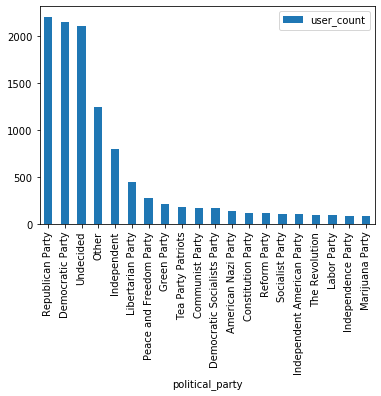

In [3]:
user_politcal_parties_dstr = loader.get_user_political_parties(plot=False)
user_politcal_parties_dstr[user_politcal_parties_dstr.index != 'Not Saying'].head(20).plot(kind='bar')


### Political Ideologies Distribution

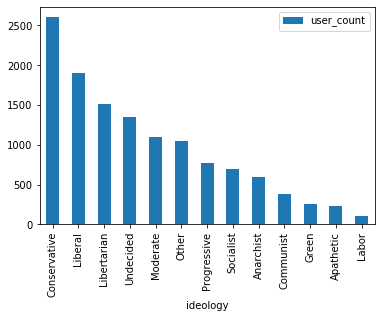

In [4]:
user_ideologies_dstr = loader.get_user_ideologies(plot=False)
user_ideologies_dstr[user_ideologies_dstr.index != 'Not Saying'].head(20).plot(kind='bar')### Political Parties Distribution

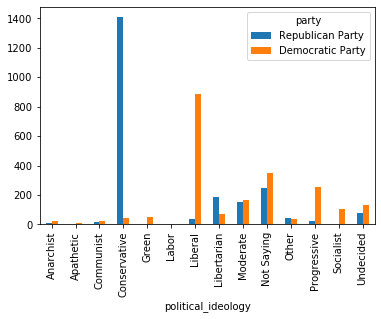

In [5]:
pd.crosstab(loader.users_df.political_ideology, 
            loader.users_df.party)[['Republican Party', 'Democratic Party']].plot(kind='bar')
#Not Saying                             33910
#Republican Party                        2210
#Democratic Party                        2151
#Undecided                               2110
#Other                                   1245
#Independent                              802
#Libertarian Party                        449

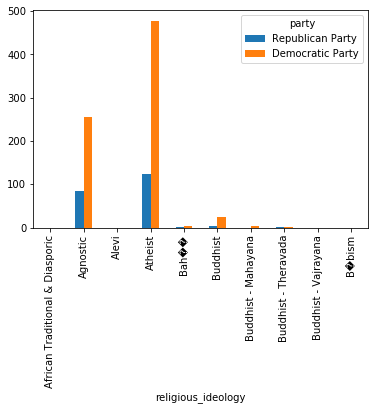

In [7]:
pd.crosstab(loader.users_df.religious_ideology, 
            loader.users_df.party)[['Republican Party', 'Democratic Party']].head(10).plot(kind='bar')

### Debate Categories Distribution

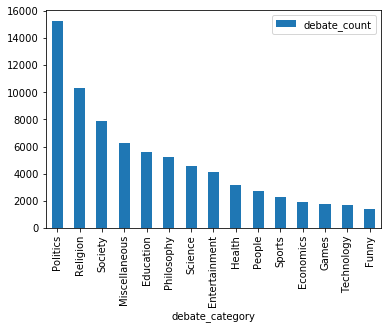

In [8]:
debate_categories_dstr = loader.get_debate_categories(plot=True)

### Discovering Data structure

In [9]:

loader.users_df.columns


Index(['all_debates', 'big_issues_dict', 'birthday', 'description',
       'education', 'elo_ranking', 'email', 'ethnicity', 'gender', 'friends',
       'income', 'interested', 'joined', 'last_online', 'last_updated',
       'looking', 'lost_debates', 'number_of_all_debates',
       'number_of_lost_debates', 'number_of_tied_debates',
       'number_of_won_debates', 'number_of_friends',
       'number_of_opinion_arguments', 'number_of_opinion_questions',
       'number_of_poll_topics', 'number_of_poll_votes',
       'number_of_voted_debates', 'opinion_arguments', 'opinion_questions',
       'party', 'percentile', 'political_ideology', 'poll_topics',
       'poll_votes', 'president', 'relationship', 'religious_ideology', 'url',
       'voted_debates', 'win_ratio', 'won_debates', 'tied_debates'],
      dtype='object')

In [10]:
loader.users_df.loc['Dovahkinn117']

all_debates                    [Should-turbocharged-vehicles-require-a-blow-o...
big_issues_dict                {'Abortion': 'N/S', 'Affirmative Action': 'N/S...
birthday                                                             - Private -
description                                                                     
education                                                             Not Saying
elo_ranking                                                                1,815
email                                                                - Private -
ethnicity                                                             Not Saying
gender                                                         Prefer not to say
friends                                                                       []
income                                                                Not Saying
interested                                                             No Answer
joined                      

In [ ]:
loader.debates_df.number_of_rounds.value_counts().to_frame().head(10).plot(kind= 'bar')

In [85]:
loader.debates_df.iloc[3]

url                       http://www.debate.org/debates/...Words-can-t-h...
category                                                            Society
title                                           ...Words can't hurt me any.
comments                  [{'user_name': 'wjmelements', 'time': '9 years...
votes                     [{'user_name': 'wjmelements', 'time': '9 years...
rounds                    [[{'side': 'Pro', 'text': '
  
I'm sure every...
forfeit_label                                                         False
forfeit_side                                                           None
start_date                                                       12/19/2007
update_date                                                    10 years ago
voting_style                                                           Open
debate_status                                                 Voting Period
number_of_comments                                                        5
number_of_vie

In [100]:
len(loader.debates_df.loc['1-does-not-equal-2/1/'].votes) #17


17

In [103]:
#### DEBUGGING SHIT
len(loader.debates_df.loc['1-does-not-equal-2/1/'][['votes']].values)#[0]#[0]
len(loader.debates_df.loc['1-does-not-equal-2/1/'].votes[3])

loader.debates_df.loc['1-does-not-equal-2/1/'].votes[3]
#loader.debates_df[['votes']].values[3][1]
#print(loader.debates_df.number_of_rounds[0])

votes_1 = 0
votes_gt_1 = 0
votes_0= 0
for ix, row in loader.debates_df.iterrows():
    if len(row.votes) > 1:
        votes_gt_1 += 1 #print(ix)

    elif len(row.votes) ==1:
        votes_1 += 1 #print(ix)
        #break

    elif len(row.votes) ==0:
        votes_0 += 1 #print(ix)
        #print(np.array(row.votes).shape, ' #of votes:', row.number_of_votes)

print(votes_0) #'29489'
print(votes_1) # 17598
print(votes_gt_1) # 31289

print(len(loader.debates_df[loader.debates_df['number_of_votes'] == 0]))
print(len(loader.debates_df[loader.debates_df['number_of_votes'] == 1]))
print(len(loader.debates_df[loader.debates_df['number_of_votes'] > 1]))

29489
17598
31289
29489
17598
31289


In [104]:
# 1. get liberal users
LIBERAL_IDEOLOGY = 'Liberal'
CONSERVATIVE_IDEOLOGY = 'Conservative'
IDEOLOGIES = [LIBERAL_IDEOLOGY, CONSERVATIVE_IDEOLOGY]


lib_cons_users_df = loader.users_df[(loader.users_df['political_ideology'] == LIBERAL_IDEOLOGY) | \
                                   (loader.users_df['political_ideology'] == CONSERVATIVE_IDEOLOGY)]
liberal_cons_user_ids = lib_cons_users_df.index.values.tolist()
print(len(liberal_cons_user_ids))

4503


In [105]:
# get debates where participant is liberal or cons
debates_sub_df = loader.debates_df[(loader.debates_df['participant_1_name'].isin(liberal_cons_user_ids)) | \
                                   (loader.debates_df['participant_2_name'].isin(liberal_cons_user_ids))
                                  
                                  ].copy()

print(len(debates_sub_df))


23160


In [ ]:
loader.debates_df.columns.tolist()

In [ ]:
rounds = loader.debates_df['rounds'].values[0]
print(len(rounds))
print(loader.debates_df['number_of_rounds'].values[0])

print(rounds[0][0]['text'])
    
# loader.debates_df[['number_of_rounds']].describe()
# comments - array of:
    #  {'user_name': 'Dovahkinn117',
    #  'time': '5 years ago',
    #  'comment_text': 'I concede this debate, Alexander, you beat me fair and square.'},
    
# votes - array of:
    # {'user_name': 'Shifter',
    # 'time': '5 years ago',
    # 'votes_map': 
        # {
            # 'Dovahkinn117':  ## participant_1_name
                # {'Agreed with before the debate': False                
                # 'Agreed with after the debate': False,
                # 'Who had better conduct': False,
                # 'Had better spelling and grammar': False,
                # 'Made more convincing arguments': False,
                # 'Used the most reliable sources': False,
                # 'Total points awarded': '0'},
            # 'Alexander_The_Great':  ## participant_2_name
                # {'Agreed with before the debate': False,
                # 'Agreed with after the debate': False,
                # 'Who had better conduct': False,
                # 'Had better spelling and grammar': False,
                # 'Made more convincing arguments': True,
                # 'Used the most reliable sources': True,
                # 'Total points awarded': '5'},
            # 'Tied': {'Agreed with before the debate': True, ## always there
                # 'Agreed with after the debate': True,
                # 'Who had better conduct': True,
                # 'Had better spelling and grammar': True,
                # 'Made more convincing arguments': False,
                # 'Used the most reliable sources': False}
        #}
     #}
        
# rounds an array of rounds:
  # each round has an array of 2 dict (side 1 Pro and 1 Con, text )
    
# ? : forfeit_side, forfeit_label

# start_date (actual date: '10/10/2012'), update_date (5 years ago)
# ? voting_sytle: 'Open', 'Open with Elo Restrictions', 'Judge'
# debate_status: 'Voting Period', 'Post Voting Period', 'Debating Period', 'Challenge Period'
# number_of_comments' 'number_of_views'??, 'number_of_rounds', 'number_of_votes',

In [ ]:
# create a dataframe 
# for each debate: 
#     # get for each voter:
      #  the voter political party 
      # No -- Yes EFFECTIVE
      # Yes --> No PROVOCATIVE
      # Yes --> Yes X
      # No  --> No INEFFECTIVE
# debate id, 

# participanst_ideology: same, opposite



In [110]:
def get_user_ideology(user):
    ideology = None
    if user not in loader.users_df.index.values.tolist():
        ideology = 'NOT FOUND'
    else:
        ideology = loader.users_df.loc[user]['political_ideology']
    return ideology

def get_debate_flat(df):
    result_arr = []
    debates_err_arr = []
    for i, row in df.iterrows():
        
        debate_info = {}
        debate_info['debate_id'] = i
        debate_info['category'] = row['category']
        debate_info['p1_name'] = row['participant_1_name']
        debate_info['p2_name'] = row['participant_2_name']

        
        debate_info['p1_ideology'] = get_user_ideology(row['participant_1_name'])
        debate_info['p2_ideology'] = get_user_ideology(row['participant_2_name'])

        if row['number_of_votes'] < 1:
            continue
        for voter in row['votes']:
            try:
                debate_voter = debate_info.copy()
                debate_voter['voter_username'] = voter['user_name']

                if voter['user_name'] not in loader.users_df.index.values.tolist():
                    continue
                debate_voter['voter_ideology'] = get_user_ideology(voter['user_name'])

                p1_votes = voter['votes_map'][row.participant_1_name]
                p2_votes = voter['votes_map'][row.participant_2_name]

                debate_voter['p1_agree_before'] = p1_votes['Agreed with before the debate']
                debate_voter['p1_agree_after'] = p1_votes['Agreed with after the debate']
                debate_voter['p1_convincing'] = p1_votes['Made more convincing arguments']

                debate_voter['p2_agree_before'] = p2_votes['Agreed with before the debate']
                debate_voter['p2_agree_after'] = p2_votes['Agreed with after the debate']
                debate_voter['p2_convincing'] = p2_votes['Made more convincing arguments']

                result_arr.append(debate_voter)
            except Exception as e:
                debates_err_arr.append(i)
                
                #print(e)
            
    result_df = pd.DataFrame(result_arr)
    return result_df, debates_err_arr
                
                
        

In [111]:
debate_vote_df, dismissed_debates_arr = get_debate_flat(loader.debates_df)

In [120]:
loader.debates_df.loc['If-the-Taliban-are-terrorists-then-the-United-States-are-as-well/1/'].votes

[{'user_name': 'KhalifV',
  'time': '4 years ago',
  'votes_map': {'ChosenWolff': {'Who won the debate': True},
   'Preston': {'Who won the debate': False}}},
 {'user_name': 'NathanDuclos',
  'time': '4 years ago',
  'votes_map': {'ChosenWolff': {'Who won the debate': True},
   'Preston': {'Who won the debate': False}}},
 {'user_name': 'Blade-of-Truth',
  'time': '4 years ago',
  'votes_map': {'ChosenWolff': {'Who won the debate': True},
   'Preston': {'Who won the debate': False}}},
 {'user_name': 'Seido',
  'time': '4 years ago',
  'votes_map': {'ChosenWolff': {'Who won the debate': False},
   'Preston': {'Who won the debate': True}}},
 {'user_name': 'Kc1999',
  'time': '4 years ago',
  'votes_map': {'ChosenWolff': {'Who won the debate': True},
   'Preston': {'Who won the debate': False}}},
 {'user_name': 'Domr',
  'time': '4 years ago',
  'votes_map': {'ChosenWolff': {'Who won the debate': False},
   'Preston': {'Who won the debate': True}}},
 {'user_name': 'Romanii',
  'time': '4 y

In [121]:
debate_vote_df.head(2)

,debate_id,category,p1_name,p2_name,p1_ideology,p2_ideology,voter_username,voter_ideology,p1_agree_before,p1_agree_after,p1_convincing,p2_agree_before,p2_agree_after,p2_convincing
0,.-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/,Miscellaneous,Logical-Master,beem0r,Conservative,Not Saying,jat93,Anarchist,False,False,False,False,True,True
1,.-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/,Miscellaneous,Logical-Master,beem0r,Conservative,Not Saying,Logical-Master,Conservative,False,False,True,False,False,False


In [122]:

print('debates where at least p1 or p2 is conservative or liberal',
      len(debate_vote_df['debate_id'].unique()) )

print('debates where at  p1-p2 are a conservative- liberal pair',
      len(debate_vote_df[(debate_vote_df['p1_ideology'].isin(IDEOLOGIES)) & \
                          (debate_vote_df['p2_ideology'].isin(IDEOLOGIES)) & \
                        (debate_vote_df['p1_ideology'] != debate_vote_df['p2_ideology'])]['debate_id'].unique()))


print('debates where p1 ideology is diff than p2:',
      len(debate_vote_df[debate_vote_df['p1_ideology'] != debate_vote_df['p2_ideology']]['debate_id'].unique()))

debates where at least p1 or p2 is conservative or liberal 46018
debates where at  p1-p2 are a conservative- liberal pair 983
debates where p1 ideology is diff than p2: 36184


In [124]:
print('change between before and after:')
before_after_change_df = debate_vote_df[(debate_vote_df['voter_ideology'].isin(IDEOLOGIES)) & \
               ( ((debate_vote_df['p1_ideology'] != debate_vote_df['voter_ideology']) & \
               (debate_vote_df['p1_agree_before'] != debate_vote_df['p1_agree_after'])) |\
                ((debate_vote_df['p2_ideology'] != debate_vote_df['voter_ideology']) & \
               (debate_vote_df['p2_agree_before'] != debate_vote_df['p2_agree_after'])) )]


print('total votes changed: ', len(before_after_change_df))
print('unique debates:', len(before_after_change_df['debate_id'].unique()))

change between before and after:
total votes changed:  2262
unique debates: 2086


In [ ]:
changing_debates =before_after_change_df['debate_id'].unique().tolist()
changing_debates

In [ ]:
before_after_change_df['category'].value_counts().to_frame().plot(kind='bar')

In [ ]:
# the voter is lib/cons AND 
#  they changed their mind before and after
before_after_change_df.head()

In [125]:
# group debates as - liberal
# effective
# ineffective No--> No
# provocative
# "reinforce"

#   Before              Yes             No
# After   
#      Yes             OKAY            Effective
#       No             Provocative     Ineffective

def _debate_effect(before, after):
    effect = ''
    if before and  after:
        effect = 'okay'
    elif before and not after:
        effect = 'provocative'
    elif not before and not after:
        effect = 'ineffective'
    elif not before and after:
        effect = 'effective'
        
    return effect

def _add_effect(row):
    # check voter and p1
    ideology= 'same'
    effect = ''
    row['p1_effect'] = _debate_effect(row['p1_agree_before'], row['p1_agree_after'])
    row['p2_effect'] = _debate_effect(row['p2_agree_before'], row['p2_agree_after'])
    combined_effect = [row['p1_effect'], row['p2_effect']]
    combined_effect.sort()
    row['effect'] = '-'.join(combined_effect)
    return row





debate_vote_df = debate_vote_df.apply(_add_effect, axis=1)

## check GENERAL BEFORE AFTER AGREEMENT

In [126]:
def plot_effect_dstr(df, title='' ):
    counts_df = df['effect'].value_counts().to_frame()
    counts_df.plot(kind='bar', title=title)
    

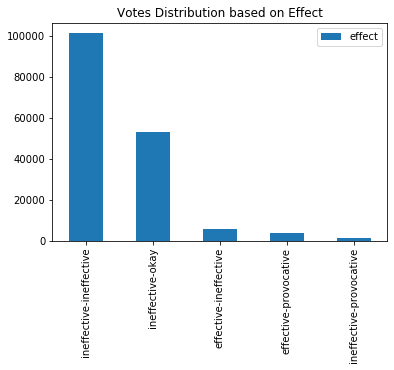

In [127]:
plot_effect_dstr(debate_vote_df, title='Votes Distribution based on Effect')

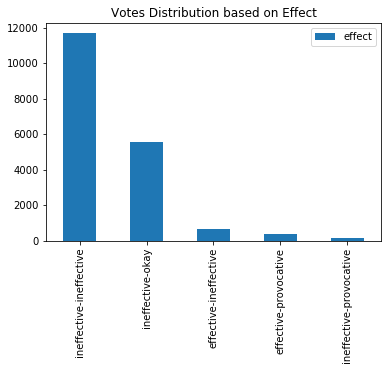

In [128]:
plot_effect_dstr(debate_vote_df[debate_vote_df['voter_ideology'] == LIBERAL_IDEOLOGY], 
                 title='Votes Distribution based on Effect')

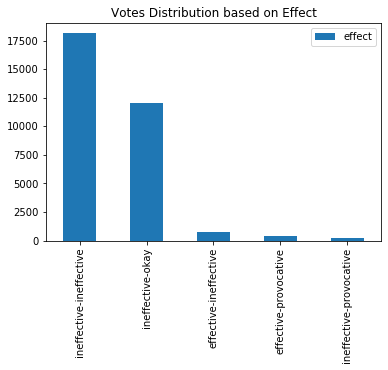

In [129]:
plot_effect_dstr(debate_vote_df[debate_vote_df['voter_ideology'] == CONSERVATIVE_IDEOLOGY], 
                 title='Votes Distribution based on Effect')

## check when before and after agreement has changed

In [ ]:
before_after_change_df.columns.tolist()

In [131]:
#before_after_change_df['p1_effect'].value_counts()

In [ ]:
before_after_change_df['p2_effect'].value_counts().to_frame()#.plot(kind='bar')

In [ ]:
before_after_change_df['effect'].value_counts().to_frame()#.plot(kind='bar')

In [ ]:
before_after_change_df[before_after_change_df['voter_ideology'] == 'Liberal']['effect'].value_counts().to_frame()#.plot(kind='bar')

In [ ]:
before_after_change_df[before_after_change_df['voter_ideology'] == 'Conservative']['effect'].value_counts().to_frame()#.plot(kind='bar')

## Setting A - Interaction between Liberal Voter and Conservative articipant or Vice versa

In [ ]:
# Setting A [restricted]
#   argument from conservative, voted by liberal (or vice versa)
def _add_lib_cons_interaction(row):
    interactions = []
    opposite = CONSERVATIVE_IDEOLOGY if row['voter_ideology'] == LIBERAL_IDEOLOGY else LIBERAL_IDEOLOGY
    if row['p1_ideology'] == opposite:
        interactions.append('p1')
    if row['p2_ideology'] == opposite:
        interactions.append('p2')
    row['interaction'] = ','.join(interactions)
    return row
    
liberal_restricted_df = debate_vote_df[(debate_vote_df['voter_ideology'] == LIBERAL_IDEOLOGY) & \
                                     ( (debate_vote_df['p1_ideology'] == CONSERVATIVE_IDEOLOGY) | \
                                      (debate_vote_df['p2_ideology'] == CONSERVATIVE_IDEOLOGY))  ]


conservative_restricted_df = debate_vote_df[(debate_vote_df['voter_ideology'] == CONSERVATIVE_IDEOLOGY) & \
                                     ( (debate_vote_df['p1_ideology'] == LIBERAL_IDEOLOGY) | \
                                      (debate_vote_df['p2_ideology'] == LIBERAL_IDEOLOGY))  ]


liberal_restricted_df = liberal_restricted_df.apply(_add_lib_cons_interaction, axis = 1)
conservative_restricted_df = conservative_restricted_df.apply(_add_lib_cons_interaction, axis = 1)

In [ ]:
len(conservative_restricted_df)

In [ ]:
conservative_restricted_df['interaction'].value_counts()

In [ ]:
liberal_restricted_df['interaction'].value_counts()

In [ ]:
liberal_restricted_df.columns.tolist()

In [ ]:
liberal_restricted_df.head()

In [133]:
def get_liberal_conservative_flat(df):
    # each row should be voter with a participant
    result = []
    for i, row in df.iterrows():

        info = {}
        info['debate_id'] = row['debate_id']
        info['category'] = row['category']
        
        info['voter_username'] = row['voter_username']
        info['voter_ideology'] = row['voter_ideology']
        
        for participant in row['interaction'].split(','):
            single_inter = info
            single_inter['p_ideology'] = row['{}_ideology'.format(participant)]
            
            single_inter['p_name'] = row['{}_name'.format(participant)]
            
            single_inter['p_agree_before'] = row['{}_agree_before'.format(participant)]
            single_inter['p_agree_after'] = row['{}_agree_after'.format(participant)]
            single_inter['p_convincing'] = row['{}_convincing'.format(participant)]
            single_inter['p_effect'] = row['{}_effect'.format(participant)]
            result.append(single_inter.copy())
    return pd.DataFrame(result)
            

In [ ]:
liberal_restricted_dataset = get_liberal_conservative_flat(liberal_restricted_df)

In [ ]:
conservative_restricted_dataset = get_liberal_conservative_flat(conservative_restricted_df)

In [ ]:
liberal_restricted_dataset['p_effect'].value_counts()

In [ ]:
conservative_restricted_dataset['p_effect'].value_counts()

## Setting B - Interaction between Liberal/Cons Voter and other_ideology participant or Vice versa

In [132]:
def _add_opposite_interaction(row):
    interactions = []
    ideology = LIBERAL_IDEOLOGY if row['voter_ideology'] == LIBERAL_IDEOLOGY else CONSERVATIVE_IDEOLOGY
    if row['p1_ideology'] != ideology:
        interactions.append('p1')
    if row['p2_ideology'] != ideology:
        interactions.append('p2')
    row['interaction'] = ','.join(interactions)
    return row

liberal_df = debate_vote_df[(debate_vote_df['voter_ideology'] == LIBERAL_IDEOLOGY) & \
                                     ( (debate_vote_df['p1_ideology'] != LIBERAL_IDEOLOGY) | \
                                      (debate_vote_df['p2_ideology'] != LIBERAL_IDEOLOGY))  ]


conservative_df = debate_vote_df[(debate_vote_df['voter_ideology'] == CONSERVATIVE_IDEOLOGY) & \
                                     ( (debate_vote_df['p1_ideology'] != CONSERVATIVE_IDEOLOGY) | \
                                      (debate_vote_df['p2_ideology'] != CONSERVATIVE_IDEOLOGY))  ]


liberal_df = liberal_df.apply(_add_opposite_interaction, axis = 1)
conservative_df = conservative_df.apply(_add_opposite_interaction, axis = 1)

In [134]:
liberal_dataset = get_liberal_conservative_flat(liberal_df)
conservative_dataset = get_liberal_conservative_flat(conservative_df)

In [135]:
liberal_dataset['p_effect'].value_counts()
liberal_dataset['p_convincing'].value_counts()

False    18082
True     14056
Name: p_convincing, dtype: int64

In [138]:
conservative_dataset['p_effect'].value_counts()
conservative_dataset['p_convincing'].value_counts()

False    31687
True     21405
Name: p_convincing, dtype: int64

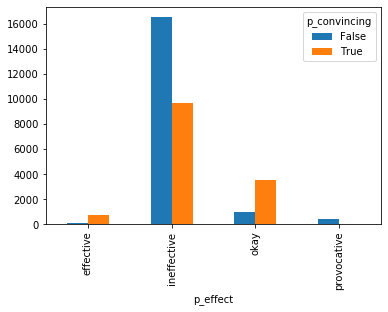

In [139]:
pd.crosstab(liberal_dataset['p_effect'], liberal_dataset['p_convincing']).plot(kind='bar')

In [ ]:
pd.crosstab(conservative_dataset['p_effect'], conservative_dataset['p_convincing']).plot(kind='bar')

In [ ]:
conservative_dataset['p_effect'].unique().tolist()

In [ ]:
conservative_dataset.head(2)

In [141]:
len(set(loader.debates_df.index.values.tolist()))

78376

In [148]:
loader.debates_df.loc['If-the-Taliban-are-terrorists-then-the-United-States-are-as-well/1/']['participant_1_name']

'ChosenWolff'

In [152]:
loader.debates_df.loc['All-Humans-Are-Homo./1/'].rounds

[[{'side': 'Pro',
   'text': "\n  \r\nToday's debate is about whether or not all humans are homo.  \n  \r\n1. Acceptance  \r\n2. Presentation of Main Argument  \r\n3 & 4. Rebuttals  \r\n5. Resolution/Closing Argument  \n  \r\nRules-  \r\nNo semantics  \r\nNo trolling  \r\nNo profanity  \r\nNo vulgarity  \n  \r\nViolating any of the rules results in immediate termination of the debate.  \n  \r\nHomo- any of a genus (Homo) of hominids that includes modern humans (H. sapiens) and several extinct related species (as H. erectus and H. habilis)  \n  \r\nHumans- (Homo sapiens) primates of the family Hominidae, and the only living species of the genus Homo."},
  {'side': 'Con',
   'text': '\n  \n  Your first rule is no semantics but if I use YOUR definitions ot highlight something then I think it\'s not semantics but merely useing your own words to explain your resolution.  Your reslution reads as follows \'  All Humans Are Homo.\'  It neither reads \'  All Humans Are One Form of Homo.\'   nor

In [198]:
import collections


def get_debate_particpant_arguments(debates, debate_id, participant):
    arguments = []
    not_found_args = {}
    debate = debates.loc[debate_id]
    
    #debate = debate[(debates['participant_1_name'] == participant) | \
    #                 (debates['participant_2_name'] == participant)]#['rounds']
    #print(debate)
    
    p_id = -1
    if debate['participant_1_name']== participant:
        p_id =  1
    elif  debate['participant_2_name']== participant:
        p_id =  2
    else:
        print('ERROR NOT MATCHING ', debate_id)
        return arguments
    position = debate['participant_{}_position'.format(p_id)]

    rounds = debate['rounds']
    found = False
    for r in rounds:
        try:
            
            for elt in r:
                if position == elt['side']:
                    arg = elt['text']
                    #if found: print('***************** found more than once')
                    found = True
                    arguments.append(arg)
    
            #print(r[position])
        except Exception as e:
            print()
            print(' EXCEPTION ')
            #print(r)
            print(debate_id, ' ', participant)
            #print(' +++++++++++++++++++++++++++++ ')
            
    if not found:
        not_found_args = {
            'debate_id' : debate_id,
            'participant': participant,
            'rounds': rounds
        }
        
    
    return arguments, not_found_args

def get_debates_with_overlaping_effect(df, flatten = False):
    result = []
    not_found_arr = []
    for debate_id, debate_df in df.groupby(['debate_id', 'p_name']):
        effects = debate_df['p_effect'].unique().tolist()
        effects.sort()
        
        effect_counter = dict(collections.Counter(debate_df['p_effect'].values.tolist()))

        maj_value = max(effect_counter.values())
        top_effect = [key for key, value in effect_counter.items() if value == maj_value]
        top_effect.sort()
        
        
        
        if 'effective' in effects: effect = 'effective'
        elif 'ineffective' in effects: effect = 'ineffective'
        elif 'provocative' in effects: effect = 'provocative'
        elif 'okay' in effects: effect = 'okay'
            
        arguments , not_found_dict = get_debate_particpant_arguments(loader.debates_df, debate_id[0], debate_id[1])
        
          
    
    
        if len(arguments) == 0:
            not_found_arr.append(not_found_dict)  
            continue
            
        debate = {
            'id': '|'.join(debate_id),
            'debate_id': debate_id[0],
            'p_name': debate_id[1],
            'effects' : '-'.join(effects),
            'effect_count': effect_counter,
            'top_effect': '-'.join(top_effect),
            'effect': effect,
            'category' : debate_df['category'].values[0]
        }
        
        if flatten:
            for i in range(len(arguments)):
                single_arg_entry = debate.copy()
                single_arg_entry['round']  = i
                single_arg_entry['argument']  = arguments[i]
                result.append(single_arg_entry)
                
                
        else:
            debate['arguments']  = arguments
            result.append(debate)
    not_found_df = pd.DataFrame(not_found_arr)
    return pd.DataFrame(result), not_found_df
        

In [193]:
cons_debate_effect[cons_debate_effect['id'] == 'Civil-Disobedience-is-appropriate-in-the-fight-for-justice/1/']
d_id = 'Believing-Own-Hallucinations-Insane-What-Are-Billions-Who-Believe-Others-Hallucinations-Are-True/1/'
loader.debates_df.loc[d_id].rounds


[[{'side': 'Pro',
   'text': '\n  \n   Many people are committed to mental health institutions who act on their own hallucinations, because they believed them to be Real.  \n  \r\nYet, Billions of people on Planet Earth believe the Hallucinations of Abraham, Moses, Joshua, Solomon, etc... to be Absolute Truth.  \r\nThese include: Jews, Christians and Muslims.   \n  \n   '}]]

In [200]:
#cons_debate_effect, cons_not_found_args_df = get_debates_with_overlaping_effect(conservative_dataset, flatten=True)
lib_debate_effect, lib_not_found_args_df = get_debates_with_overlaping_effect(liberal_dataset, flatten=True)

In [201]:
cons_debate_effect.to_csv('../data/conservative_debate_arguments_w_effect.csv')
lib_debate_effect.to_csv('../data/liberal_debate_arguments_w_effect.csv')

In [203]:
cons_debate_effect['effect'].value_counts()

ineffective    97629
okay           18806
effective       3142
provocative      988
Name: effect, dtype: int64

In [ ]:
lib_debate_effect['effect'].value_counts()
lib_debate_effect.head(1)

In [ ]:
loader.debates_df.index[0]

In [ ]:
pd.crosstab(lib_debate_effect['effect'], lib_debate_effect['category']).T['effective'].plot(kind='bar')

In [ ]:
pd.crosstab(cons_debate_effect['effect'], cons_debate_effect['category']).T[['ineffective', 'effective']].plot(kind='bar')

In [ ]:
len(lib_debate_effect) #7822
lib_debate_effect.head(2)

In [ ]:
len(cons_debate_effect) # 10139
cons_debate_effect.head(2)

In [204]:
len(cons_not_found_args_df)

35257

In [211]:
cons_not_found_args_df.dropna(inplace=True)
lib_not_found_args_df.dropna(inplace=True)
cons_not_found_args_df.to_csv('../data/conservative_not_found_arguments.csv')
lib_not_found_args_df.to_csv('../data/liberal_not_found_arguments.csv')

In [212]:
cons_not_found_args_df

,debate_id,participant,rounds
3369,Believing-Own-Hallucinations-Insane-What-Are-B...,gryephon,"[[{'side': 'Pro', 'text': ' Many people ..."
4779,Civil-Disobedience-is-appropriate-in-the-fight...,g713,"[[{'side': 'Con', 'text': ' CD is never ap..."
6076,Do-Monsters-exist/2/,TheJuniorVarsityNovice,"[[{'side': 'Pro', 'text': ' Monsters do e..."
6437,Does-God-exist/4/,Puck,"[[{'side': 'Pro', 'text': ' In the beginni..."
8579,Gay-marriage-should-be-illegal./1/,Advidoct,"[[{'side': 'Con', 'text': ' I extend this ..."
9268,God-hates-you/1/,TheBuddhist2468,"[[{'side': 'Pro', 'text': ' Yes, I am an ..."
9701,Gun-Control-is-Good/1/,visionsofdylan,"[[{'side': 'Con', 'text': ' I'll keep my f..."
12241,Is-Global-Warming-man-made-and-Can-we-stop-it/1/,stand4something,"[[{'side': 'Con', 'text': ' Do you believe..."
13371,It-is-appropriate-to-use-animals-for-medical-o...,PolicyDb8r,"[[{'side': 'Con', 'text': ' First of all, ..."
19158,Reprsentation-by-population-is-not-the-best-fo...,TheLibertarian,"[[{'side': 'Con', 'text': ' One of democra..."


In [213]:
len(lib_not_found_args_df)

14

In [214]:
lib_not_found_args_df

,debate_id,participant,rounds
393,AOW-War-Scenario-Kazakhstan-pro-vs-Afghanistan...,Russia_The_almighty,"[[{'side': 'Pro', 'text': ' This is a war ..."
4083,Does-God-exist/4/,Puck,"[[{'side': 'Pro', 'text': ' In the beginni..."
4257,Donkies-should-not-wear-straw-hats/1/,Dazza01,"[[{'side': 'Con', 'text': ' It might make ..."
5467,Gay-marriage-should-be-illegal./1/,Advidoct,"[[{'side': 'Con', 'text': ' I extend this ..."
5989,God-hates-you/1/,TheBuddhist2468,"[[{'side': 'Pro', 'text': ' Yes, I am an ..."
8507,Islam-Religion-Should-Be-Condemned/1/,MagicAintReal,"[[{'side': 'Pro', 'text': ' Personally, I ..."
8608,It-is-appropriate-to-use-animals-for-medical-o...,PolicyDb8r,"[[{'side': 'Con', 'text': ' First of all, ..."
12629,Resolved-Jupiter-is-not-a-Planet./1/,TheJuniorVarsityNovice,"[[{'side': 'Pro', 'text': ' This debate i..."
12919,Resolved-There-were-no-time-travel-plot-holes-...,ryanstarwars,"[[{'side': 'Con', 'text': ' The first time..."
15395,That-the-Economic-Stimulus-Act-will-successful...,Mz.Independent,"[[{'side': 'Con', 'text': ' Learning exper..."
